In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from init import download_data, plot_line
from descriptive_analytics_fun import compute_CCreturns, get_AdjC

In [21]:
dataframes = download_data(stocks = ["AAPL", "NVDA", "KO", "UL", "BAC", "AXP"], start_stream = '2013-06-01')
ccrs = {} # continuous compounds returns
# using cc returns due to his stationary characteristic
for df in dataframes:
    ccrs[df] = compute_CCreturns(dataframes[df], name = df)

[] downloading AAPL	 -> Done
[] downloading NVDA	 -> Done
[] downloading KO	 -> Done
[] downloading UL	 -> Done
[] downloading BAC	 -> Done
[] downloading AXP	 -> Done


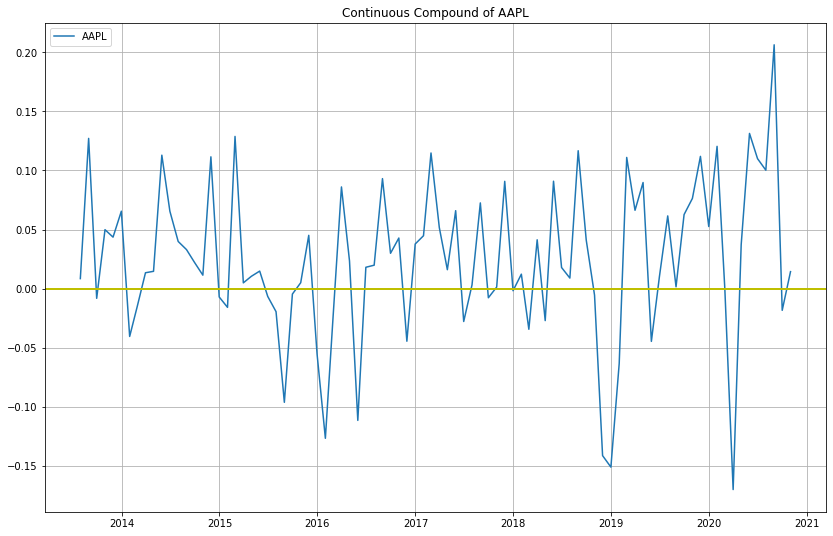

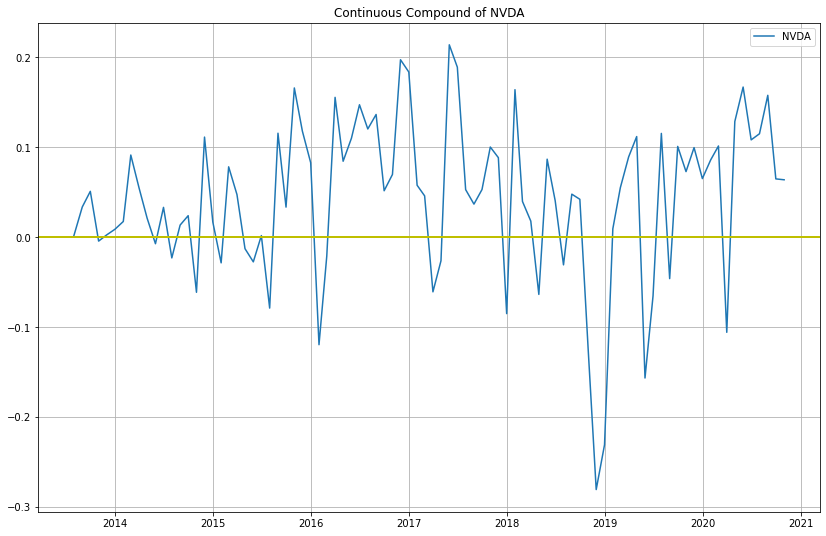

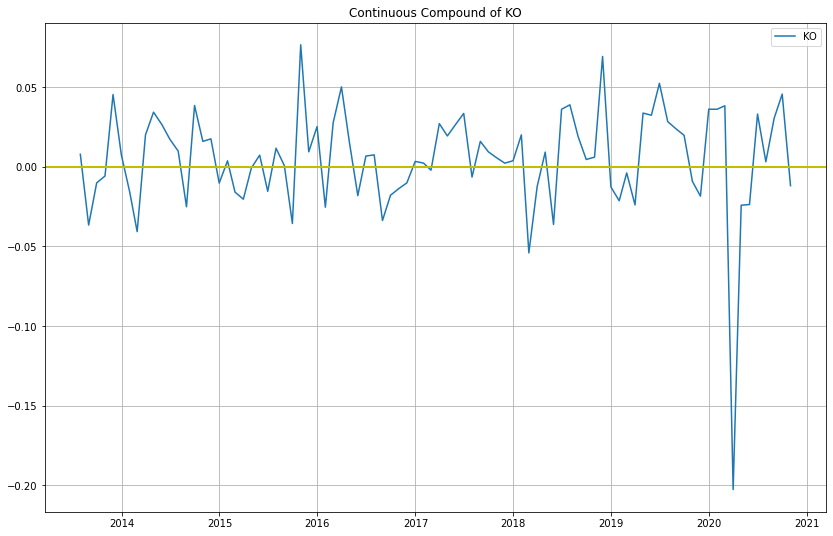

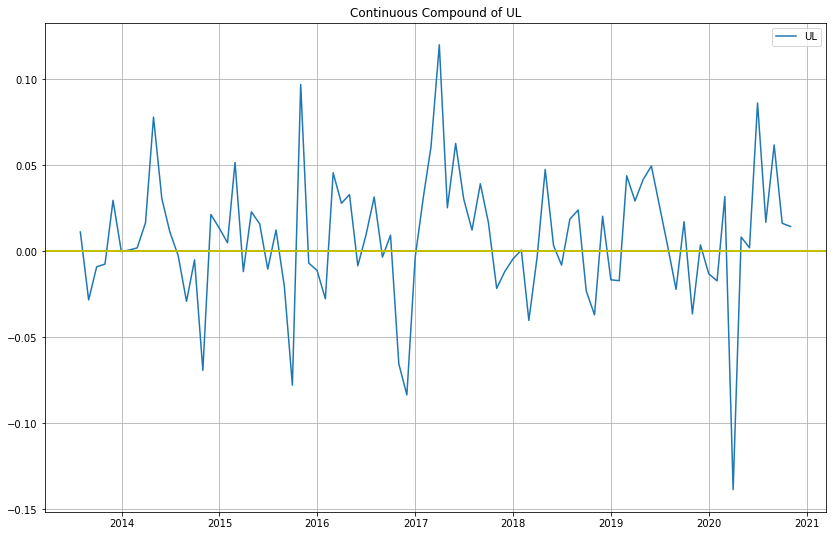

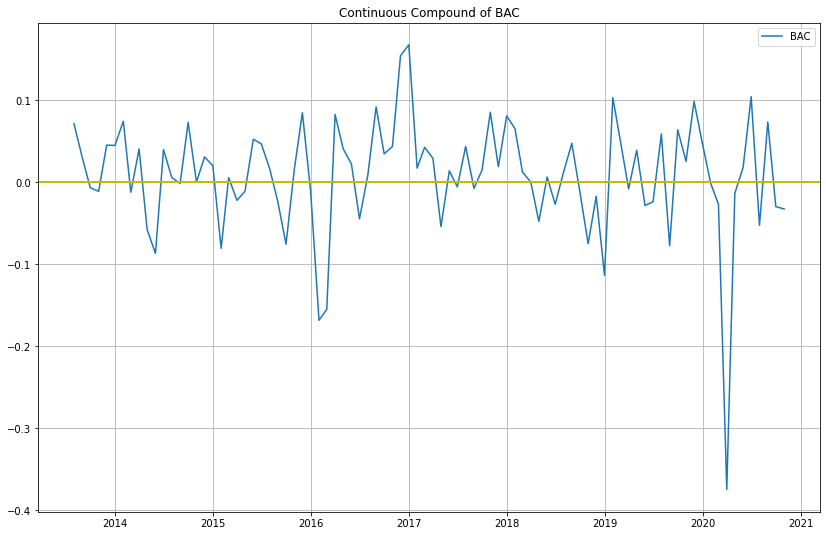

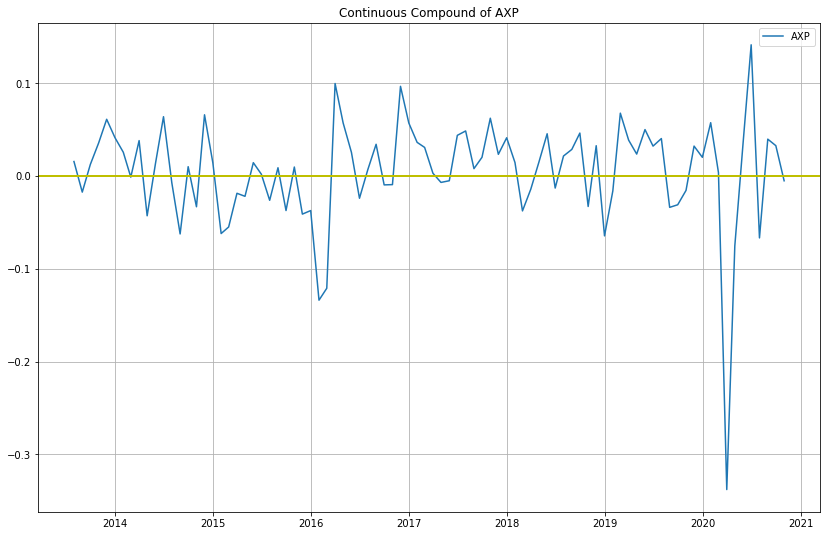

In [22]:
for s in ccrs:
    plot_line({s: ccrs[s]}, title = "Continuous Compound of " + str(s), xlabel = "time", ylabel = "value")
    plt.axhline(y = 0, linewidth = 2, color = 'y')

# showing graphs for no reason

Decomposing AAPL


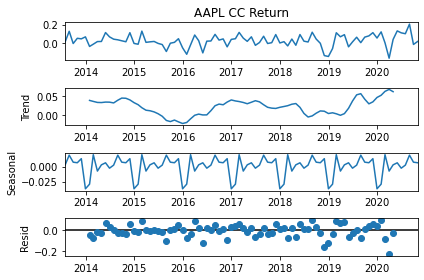

_
Decomposing NVDA


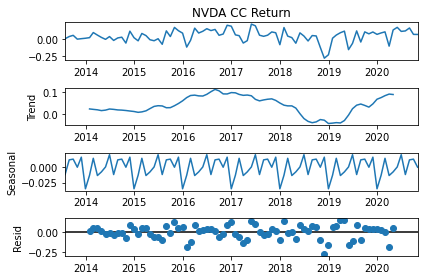

_
Decomposing KO


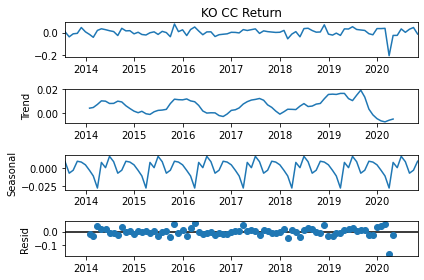

_
Decomposing UL


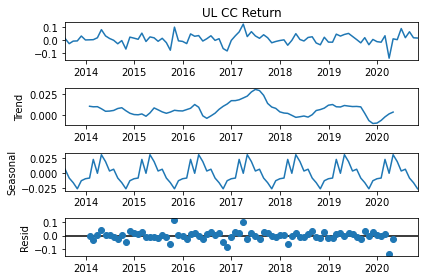

_
Decomposing BAC


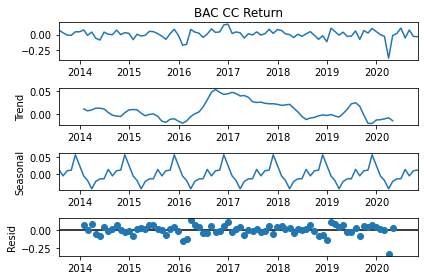

_
Decomposing AXP


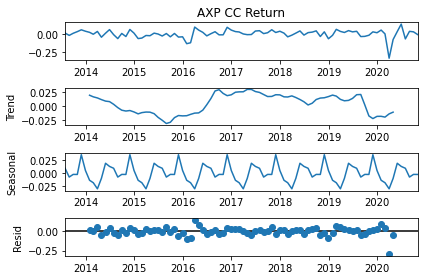

_


In [23]:
# decomposition of all stocks in ccrs
for s in ccrs:
    print("Decomposing " + s)
    fitRet = sm.tsa.seasonal_decompose(ccrs[s], period=12, model='additive')
    fitRet.plot()
    plt.show()
    print("_")

___
AutoRegressive Integrated Moving Average (ARIMA)

- (AR) Auto regression: A model that uses the dependent relationship between an observation and  some number of lagged observations
- (I) Integrated: use of differencing of raw observations in order to make the time series stationary
- (MA) Moving Average: A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Optimizing hyperparameters of AAPL


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         AAPL CC Return   No. Observations:                   88
Model:               SARIMAX(9, 0, 7)   Log Likelihood                 112.863
Date:                Mon, 01 Feb 2021   AIC                           -191.725
Time:                        23:33:13   BIC                           -151.445
Sample:                    07-31-2013   HQIC                          -175.588
                         - 10-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3556      0.312      1.141      0.254      -0.255       0.966
ar.L2         -0.2229      0.288     -0.775      0.438      -0.787       0.341
ar.L3         -0.4263      0.280     -1.524      0.127      -0.974       0.122
ar.L4          0.0680      0.346      0.197      0.844      -0.610       0.745
ar.L5         -0.3427      0.331     -1.035      0.301      -0.992       0.306
ar.L6          0.2183      0.355      0.615      0.538      -0.477       0.913
ar.L7          0.0925      0.227      0.408      0.683      -0.352       0.537
ar.L8         -0.0690      0.190     -0.362      0.717      -0.442       0.304
ar.L9          0.5166      0.133      3.871      0.000       0.255       0.778
ma.L1         -0.1533      4.391     -0.035      0.972      -8.760       8.454
ma.L2          0.0767      0.476      0.161      0.872      -0.857       1.010
ma.L3          0.6110      3.545      0.172      0.863      -6.338       7.560
ma.L4          0.1309      2.682      0.049      0.961      -5.126       5.387
ma.L5          0.4658      3.283      0.142      0.887      -5.969       6.900
ma.L6          0.1433      1.183      0.121      0.904      -2.175       2.462
ma.L7          0.0510      0.451      0.113      0.910      -0.833       0.935
sigma2         0.0031      0.018      0.169      0.865      -0.032       0.039
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 3.85
Prob(Q):                              0.76   Prob(JB):                         0.15
Heteroskedasticity (H):               1.33   Skew:                            -0.50
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Best_found = (9, 0, 7)
rmse = 0.060808087769840174
Execution time: 12.779897928237915


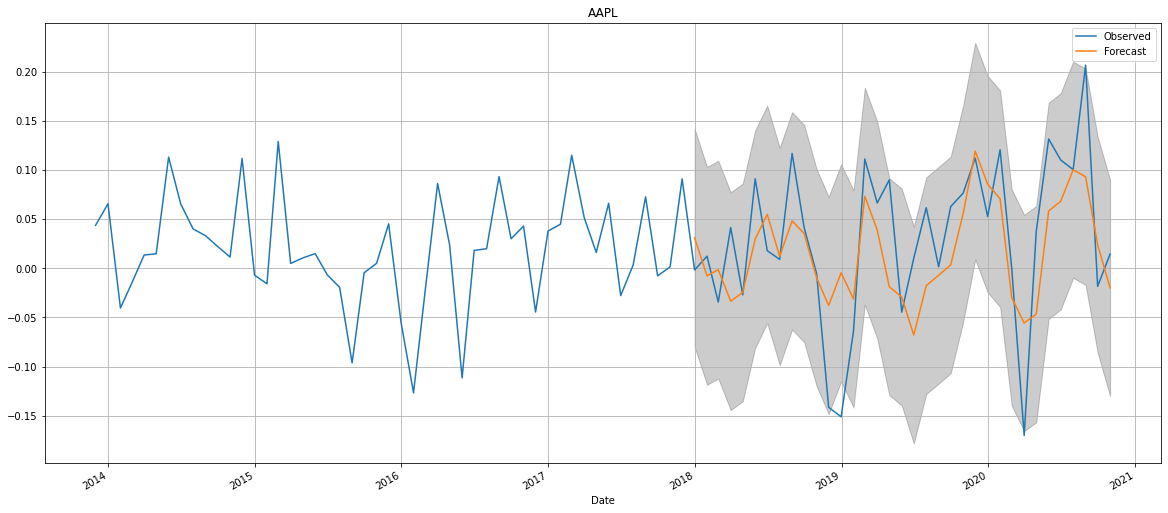

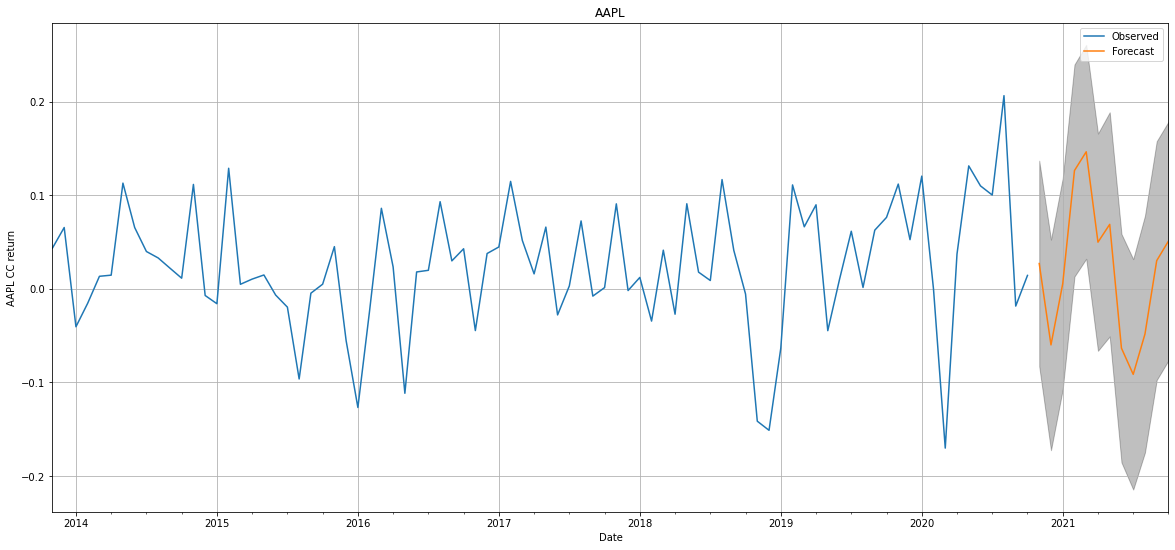





Optimizing hyperparameters of NVDA


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         NVDA CC Return   No. Observations:                   88
Model:               SARIMAX(9, 0, 7)   Log Likelihood                  80.895
Date:                Mon, 01 Feb 2021   AIC                           -127.791
Time:                        23:33:26   BIC                            -87.510
Sample:                    07-31-2013   HQIC                          -111.653
                         - 10-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6288      1.475      0.426      0.670      -2.263       3.520
ar.L2          0.1586      1.506      0.105      0.916      -2.793       3.111
ar.L3          0.3954      1.246      0.317      0.751      -2.046       2.837
ar.L4         -0.2856      1.239     -0.230      0.818      -2.715       2.143
ar.L5         -0.1209      1.168     -0.104      0.918      -2.410       2.168
ar.L6          0.3738      1.025      0.365      0.715      -1.635       2.383
ar.L7         -0.1141      0.865     -0.132      0.895      -1.809       1.581
ar.L8          0.0465      0.346      0.134      0.893      -0.631       0.724
ar.L9         -0.1548      0.256     -0.606      0.545      -0.656       0.346
ma.L1         -3.7541     37.451     -0.100      0.920     -77.157      69.649
ma.L2          2.0896     11.658      0.179      0.858     -20.759      24.938
ma.L3          2.8336     15.199      0.186      0.852     -26.956      32.623
ma.L4          1.8044     34.947      0.052      0.959     -66.690      70.299
ma.L5         -1.4449     14.606     -0.099      0.921     -30.072      27.182
ma.L6         -1.8818      4.783     -0.393      0.694     -11.257       7.493
ma.L7          0.8970      2.928      0.306      0.759      -4.842       6.636
sigma2         0.0003      0.003      0.089      0.929      -0.006       0.007
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 3.22
Prob(Q):                              0.60   Prob(JB):                         0.20
Heteroskedasticity (H):               1.94   Skew:                            -0.49
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.69e+17. Standard errors may be unstable.
"""

Best_found = (9, 0, 7)
rmse = 0.060808087769840174
Execution time: 25.408854007720947


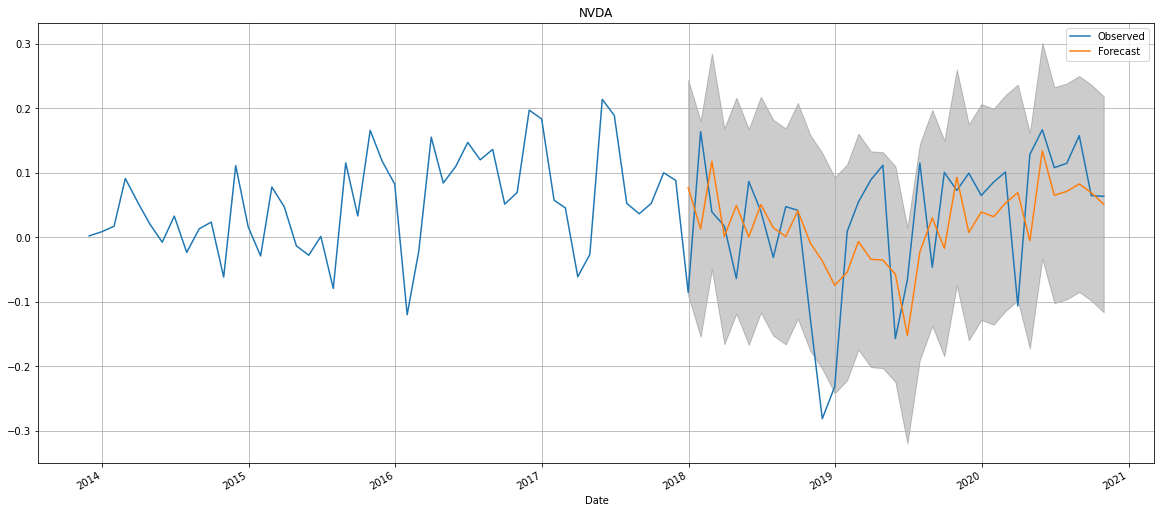

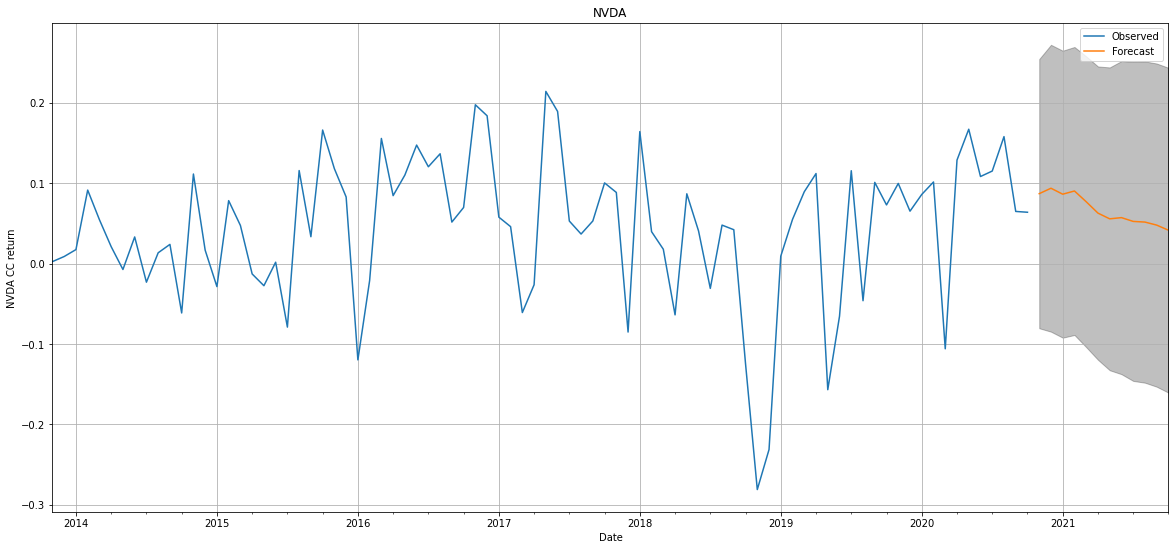





Optimizing hyperparameters of KO


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           KO CC Return   No. Observations:                   88
Model:               SARIMAX(9, 0, 7)   Log Likelihood                 163.555
Date:                Mon, 01 Feb 2021   AIC                           -293.110
Time:                        23:33:39   BIC                           -252.830
Sample:                    07-31-2013   HQIC                          -276.973
                         - 10-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6662      0.568      1.173      0.241      -0.447       1.779
ar.L2         -0.2129      0.630     -0.338      0.735      -1.447       1.021
ar.L3         -0.4696      0.426     -1.102      0.271      -1.305       0.366
ar.L4         -0.1437      0.221     -0.650      0.516      -0.577       0.289
ar.L5          0.5540      0.253      2.190      0.029       0.058       1.050
ar.L6         -0.8579      0.450     -1.906      0.057      -1.740       0.024
ar.L7          0.1461      0.609      0.240      0.810      -1.048       1.340
ar.L8         -0.0036      0.360     -0.010      0.992      -0.708       0.701
ar.L9         -0.4137      0.282     -1.468      0.142      -0.966       0.139
ma.L1         -0.6185      0.537     -1.152      0.249      -1.671       0.434
ma.L2          0.2000      0.592      0.338      0.735      -0.960       1.360
ma.L3          0.4430      0.519      0.853      0.393      -0.574       1.460
ma.L4          0.3643      0.308      1.184      0.236      -0.239       0.967
ma.L5         -0.7002      0.389     -1.801      0.072      -1.462       0.062
ma.L6          0.6519      0.518      1.258      0.208      -0.364       1.667
ma.L7          0.1817      0.580      0.313      0.754      -0.954       1.318
sigma2         0.0008      0.000      2.767      0.006       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):               100.43
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               2.68   Skew:                            -1.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Best_found = (9, 0, 7)
rmse = 0.036815356519080786
Execution time: 38.773072957992554


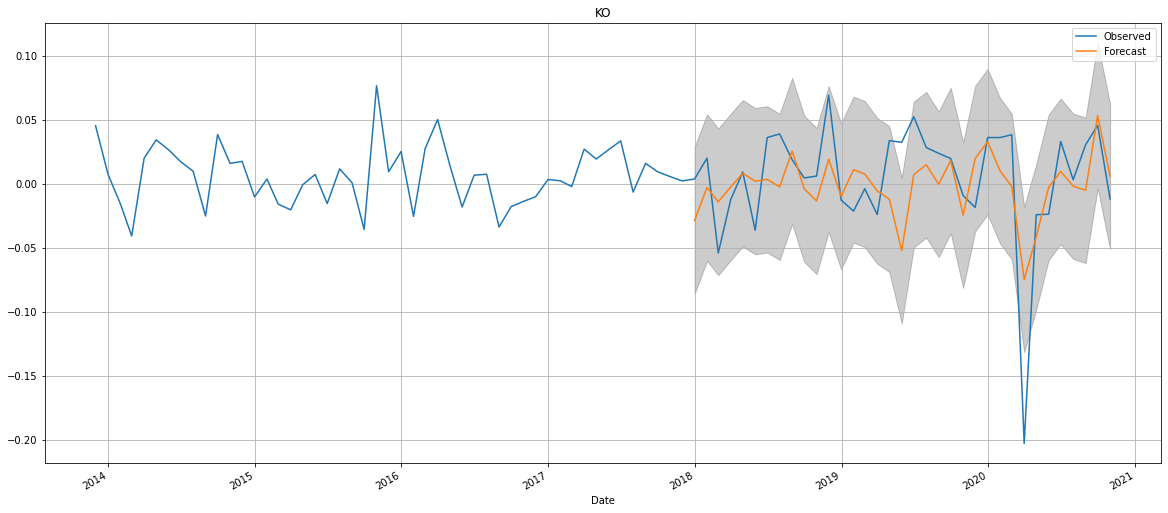

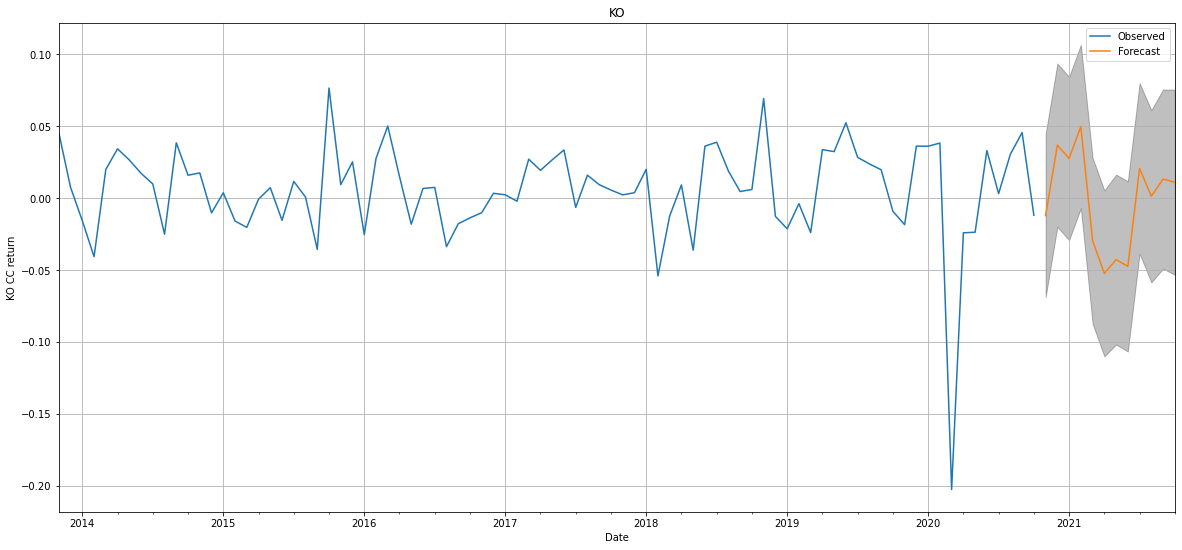





Optimizing hyperparameters of UL


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           UL CC Return   No. Observations:                   88
Model:               SARIMAX(9, 0, 7)   Log Likelihood                 151.216
Date:                Mon, 01 Feb 2021   AIC                           -268.431
Time:                        23:33:52   BIC                           -228.151
Sample:                    07-31-2013   HQIC                          -252.294
                         - 10-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3461      0.609      0.569      0.570      -0.847       1.539
ar.L2         -0.2191      0.640     -0.342      0.732      -1.474       1.036
ar.L3          0.1657      0.597      0.277      0.781      -1.005       1.336
ar.L4         -0.0318      0.731     -0.043      0.965      -1.465       1.402
ar.L5         -0.4864      0.717     -0.678      0.498      -1.893       0.920
ar.L6         -0.2935      0.872     -0.337      0.736      -2.003       1.416
ar.L7          0.0060      0.690      0.009      0.993      -1.346       1.358
ar.L8         -0.0263      0.200     -0.131      0.896      -0.419       0.366
ar.L9         -0.2072      0.215     -0.966      0.334      -0.628       0.213
ma.L1         -0.3418      1.151     -0.297      0.767      -2.599       1.915
ma.L2          0.3984      2.428      0.164      0.870      -4.361       5.158
ma.L3         -0.3175      1.757     -0.181      0.857      -3.761       3.126
ma.L4         -0.0311      1.484     -0.021      0.983      -2.939       2.877
ma.L5          0.5239      1.593      0.329      0.742      -2.599       3.647
ma.L6          0.3953      1.706      0.232      0.817      -2.949       3.739
ma.L7          0.1072      0.719      0.149      0.881      -1.302       1.516
sigma2         0.0011      0.003      0.330      0.742      -0.005       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                24.60
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.27
Prob(H) (two-sided):                  0.86   Kurtosis:                         5.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Best_found = (9, 0, 7)
rmse = 0.032461949086747814
Execution time: 52.071582078933716


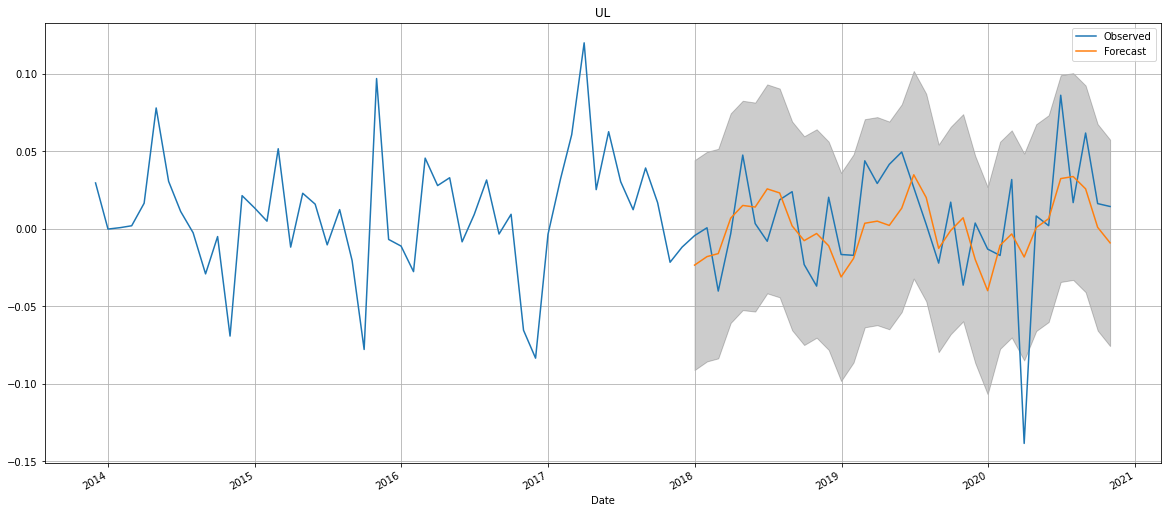

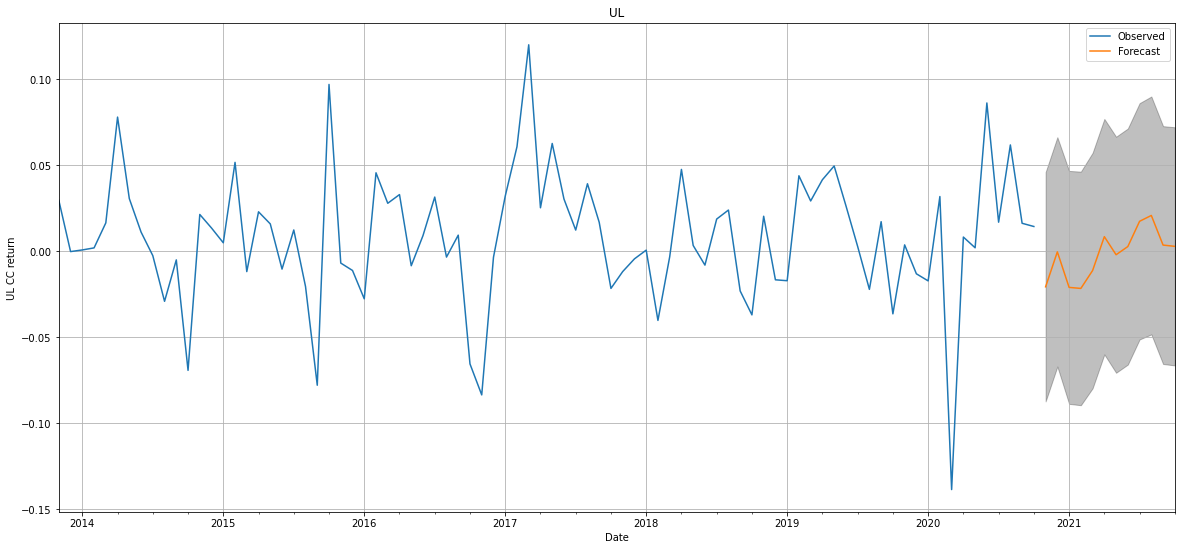





Optimizing hyperparameters of BAC


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          BAC CC Return   No. Observations:                   88
Model:               SARIMAX(9, 0, 7)   Log Likelihood                  96.753
Date:                Mon, 01 Feb 2021   AIC                           -159.505
Time:                        23:34:06   BIC                           -119.225
Sample:                    07-31-2013   HQIC                          -143.368
                         - 10-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0370      2.627      0.014      0.989      -5.112       5.186
ar.L2         -0.3821      2.205     -0.173      0.862      -4.704       3.940
ar.L3         -0.2873      2.015     -0.143      0.887      -4.236       3.662
ar.L4         -0.2569      1.012     -0.254      0.800      -2.240       1.726
ar.L5         -0.0276      1.884     -0.015      0.988      -3.721       3.666
ar.L6         -0.1823      1.186     -0.154      0.878      -2.507       2.142
ar.L7         -0.0269      1.477     -0.018      0.985      -2.922       2.869
ar.L8          0.0586      0.359      0.163      0.870      -0.645       0.762
ar.L9          0.0068      0.252      0.027      0.979      -0.488       0.501
ma.L1          1.7336     29.004      0.060      0.952     -55.113      58.581
ma.L2         -0.1914      6.970     -0.027      0.978     -13.853      13.470
ma.L3          1.1075      8.036      0.138      0.890     -14.642      16.857
ma.L4          0.1508      5.581      0.027      0.978     -10.787      11.089
ma.L5          0.4839      4.032      0.120      0.904      -7.419       8.387
ma.L6         -0.0274      2.433     -0.011      0.991      -4.795       4.741
ma.L7          0.2778      2.849      0.098      0.922      -5.306       5.862
sigma2         0.0011      0.028      0.042      0.967      -0.053       0.055
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               230.52
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.37   Skew:                            -1.76
Prob(H) (two-sided):                  0.03   Kurtosis:                        10.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Best_found = (9, 0, 7)
rmse = 0.032461949086747814
Execution time: 65.10627102851868


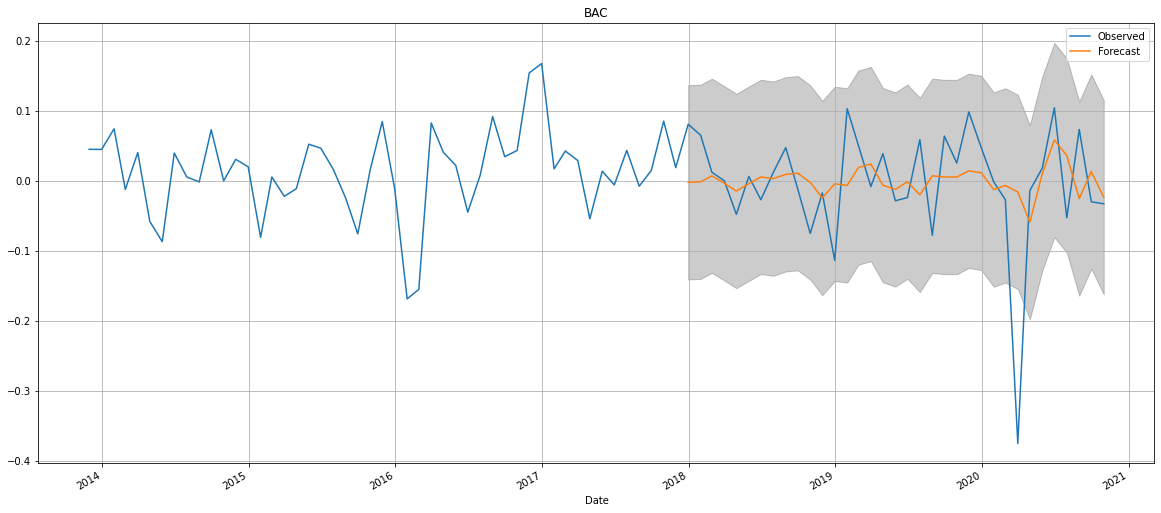

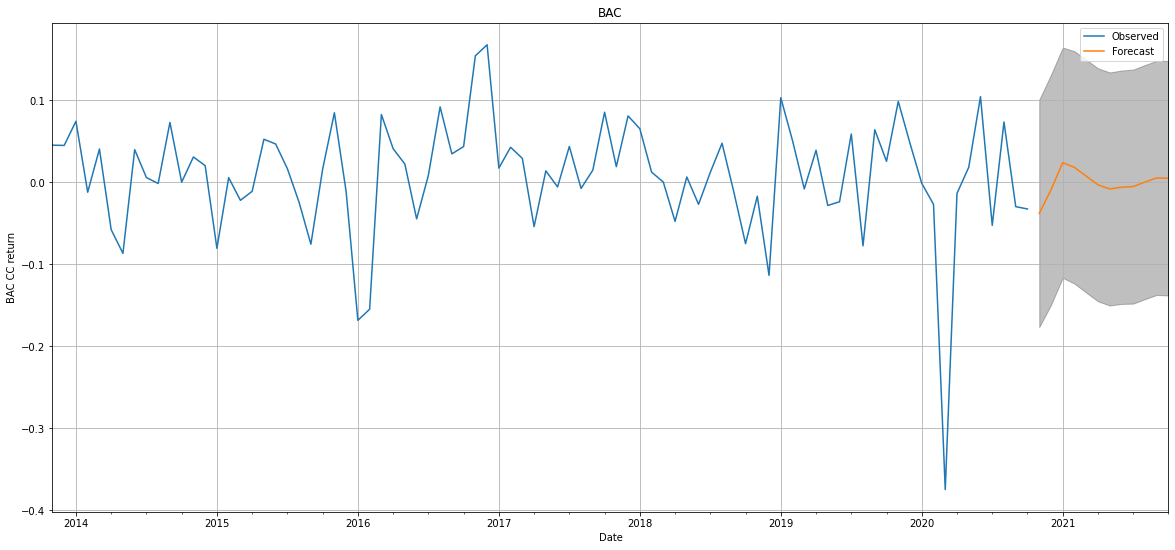





Optimizing hyperparameters of AXP


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          AXP CC Return   No. Observations:                   88
Model:               SARIMAX(9, 0, 7)   Log Likelihood                 118.611
Date:                Mon, 01 Feb 2021   AIC                           -203.222
Time:                        23:34:19   BIC                           -162.941
Sample:                    07-31-2013   HQIC                          -187.084
                         - 10-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4504      1.127      0.400      0.689      -1.758       2.659
ar.L2         -0.1562      0.879     -0.178      0.859      -1.880       1.567
ar.L3         -0.3593      0.395     -0.910      0.363      -1.133       0.414
ar.L4          0.3509      0.516      0.681      0.496      -0.660       1.362
ar.L5         -0.8880      0.442     -2.011      0.044      -1.753      -0.023
ar.L6          0.1857      1.116      0.166      0.868      -2.001       2.373
ar.L7          0.3407      0.668      0.510      0.610      -0.969       1.650
ar.L8         -0.2525      0.301     -0.838      0.402      -0.843       0.338
ar.L9          0.1222      0.359      0.340      0.734      -0.582       0.826
ma.L1         -0.2298      5.576     -0.041      0.967     -11.158      10.698
ma.L2         -0.0791      0.857     -0.092      0.926      -1.760       1.601
ma.L3          0.2301      3.748      0.061      0.951      -7.116       7.576
ma.L4         -0.0900      4.434     -0.020      0.984      -8.780       8.600
ma.L5          0.8563      4.877      0.176      0.861      -8.702      10.414
ma.L6         -0.0955      2.017     -0.047      0.962      -4.048       3.857
ma.L7         -0.1904      1.596     -0.119      0.905      -3.319       2.938
sigma2         0.0026      0.017      0.152      0.879      -0.031       0.036
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):               277.93
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               1.85   Skew:                            -1.98
Prob(H) (two-sided):                  0.12   Kurtosis:                        11.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Best_found = (9, 0, 7)
rmse = 0.032461949086747814
Execution time: 78.62064790725708


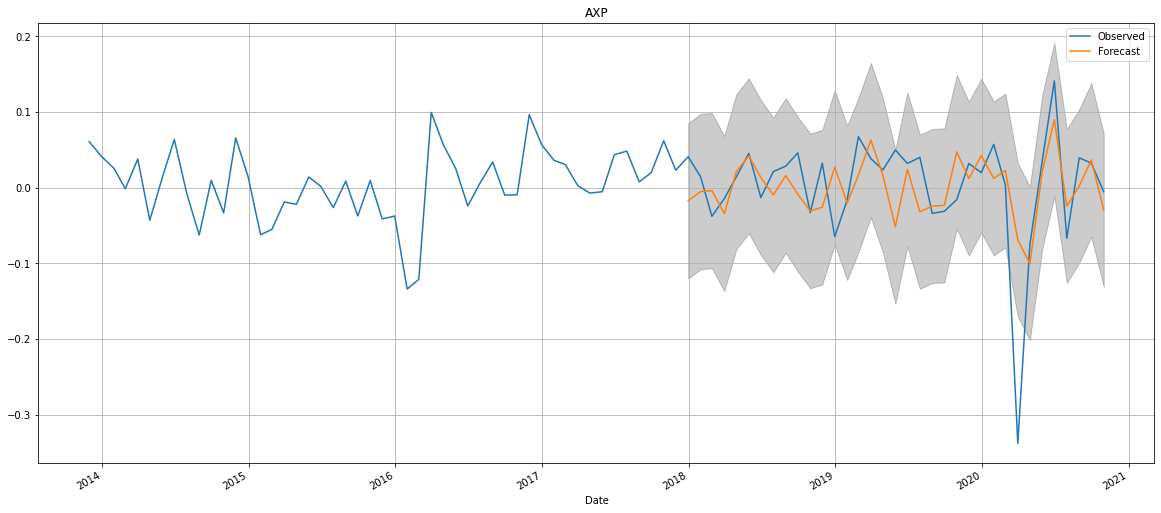

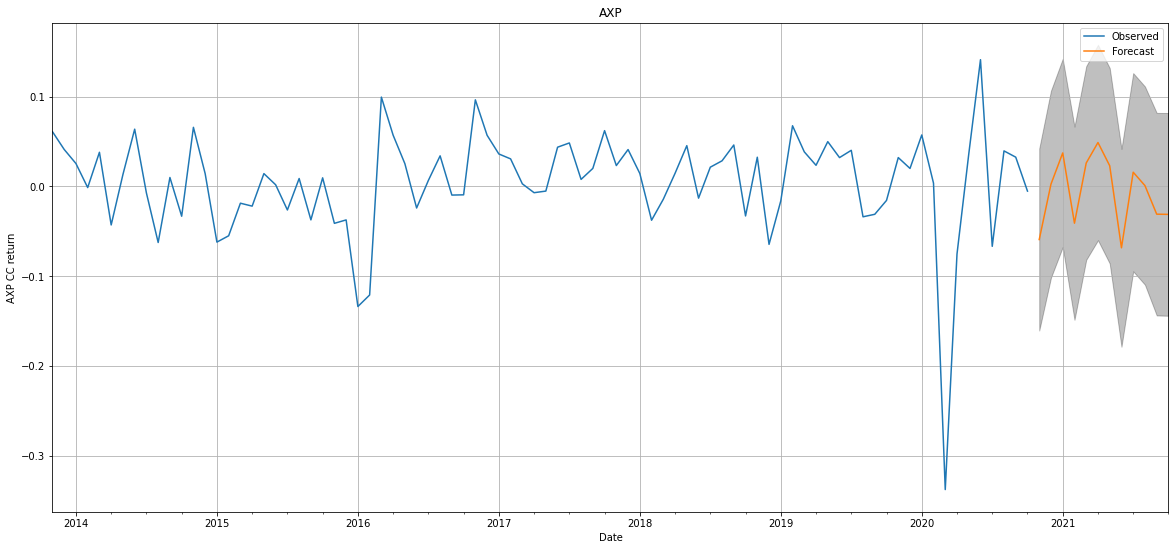

In [24]:
# inserire qui l'id dell'azione sul quale effettuare forecasting ed eseguire le celle sottostanti
# list stocks -> "AAPL", "NVDA", "KO", "UL", "BAC", "AXP"
stocks = ["AAPL", "NVDA", "KO", "UL", "BAC", "AXP"]

pred_uc = {}

# finding best parameters:

best_found = {}
for s in stocks:
    best_found[s] = (np.nan, np.nan, np.nan)
min_rmse = np.inf

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

import time
start = time.time()
# misuro il tempo di esecizione

for s in stocks:
    print(f'Optimizing hyperparameters of {s}')
    for p in range(0, 10):
        for q in range(0, 8):
            # order = (number of autoregressor, _, numbers of moving averages)
            model = sm.tsa.statespace.SARIMAX(ccrs[s], order = (p, 0, q), 
                                  enforce_stationarity = False, 
                                  enforce_invertibility = False)
            results = model.fit()

            # trying to predict the present values
            # let the data start from gen 2018 (last day of 2017)
            # dynamic parameter: True if I want to predict basing my guessing on real data, False otherwise
            pred = results.get_prediction(start = pd.to_datetime('2017-12-31'), dynamic = False)
            # calculating prediction performarce using Root Mean Squared Error
            # closer to 0 -> better
            rmse = np.sqrt((((pred.predicted_mean - ccrs[s])**2).mean()))
            if(rmse < min_rmse):
                min_rmse = rmse
                best_found = (p, 0, q)


    # - ar.L1 e ar.L2 sono i due coefficienti stimati per l'autoregressione
    # - ma.L1, ma.L2, ma.L3, ma.L4 sono i quattro risultati della media mobile
    display(results.summary())
    
    print(f'Best_found = {best_found}')
    print(f'rmse = {min_rmse}')
    end = time.time()
    print(f'Execution time: {end - start}')
    
    # confidence interval
    pred_ci = pred.conf_int(alpha = 0.05) # 95%
    # pred_ci # uncomment to see the dataset
    lower = pred_ci.iloc[:,0] # first column
    upper = pred_ci.iloc[:,1] # second column

    plt.figure(figsize = (20, 9))

    time_shift = ccrs[s].size-12*7 # plotting only last 7 years
    plt.plot(ccrs[s].iloc[time_shift:], label='Observed')

    ax = pred.predicted_mean.plot(label='Forecast')
    plt.grid(True)
    ax.fill_between(pred_ci.index, lower, upper, color='k', alpha=.2)
    plt.legend()
    plt.title(s)
    # plt.savefig('img_forecast/'+ str(11) + '-forecast_arima_test_' + s +'.png', dpi=300)
    plt.show()
    
    
    # trying to forecast the future values
    pred_uc[s] = results.get_forecast(steps = 12)
    # steps = 12 -> 12 month ahead (the data is monthly)
    
    pred_ci = pred_uc[s].conf_int() # default 95%
    lower = pred_ci.iloc[:,0]
    upper = pred_ci.iloc[:,1]

    plt.figure(figsize = (20, 9))

    time_shift = ccrs[s].size-12*7 # plotting only last 7 years
    ax = ccrs[s].iloc[time_shift:].plot(label = 'Observed')

    pred_uc[s].predicted_mean.plot(ax = ax, label = 'Forecast')
    ax.fill_between(pred_ci.index, lower, upper, color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel(s + ' CC return')
    plt.title(s)
    plt.grid(True)
    plt.legend()
    # plt.savefig('img_forecast/'+ str(12) + '-forecast_arima_pred_' + s +'.png', dpi=300)
    plt.show()
    print('\n\n\n')